In [1]:
# pip install regex
# pip install emoji
# pip install numpy
# pip install plotly
# pip install matplotlib
# pip install wordcloud

In [2]:
import pandas as pd
import re

import regex
import emoji

import numpy as np
from collections import Counter

import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

C:\Users\PERSONAL\AppData\Local\Temp\ipykernel_4300\3394133317.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# PRIMEROS PASOS, PREPARR DATOS

In [3]:
with open('./data.txt', encoding='utf-8') as file:
    content = file.read()

print(content)

15/7/2023, 3:57 p. m. - Los mensajes y las llamadas están cifrados de extremo a extremo. Nadie fuera de este chat, ni siquiera WhatsApp, puede leerlos ni escucharlos. Toca para obtener más información.
15/7/2023, 3:57 p. m. - Timbre <33333: Hola
15/7/2023, 3:57 p. m. - Timbre <33333: ?
15/7/2023, 3:57 p. m. - .: Hola
15/7/2023, 3:57 p. m. - .: quien eres?
15/7/2023, 3:57 p. m. - .: kajdkd
15/7/2023, 3:58 p. m. - Timbre <33333: Lo mejor que le pasó en su vida
15/7/2023, 3:58 p. m. - .: Pero
15/7/2023, 3:58 p. m. - .: Mafe?
15/7/2023, 3:58 p. m. - .: Yo JAJAJAJ
15/7/2023, 3:58 p. m. - Timbre <33333: Lo dudas? Uy no, así no se puede
15/7/2023, 3:58 p. m. - Timbre <33333: Holaaaaaa
15/7/2023, 3:58 p. m. - .: Holaaaaa
15/7/2023, 3:58 p. m. - .: 🤠
15/7/2023, 3:58 p. m. - Timbre <33333: Cambie de número
15/7/2023, 3:59 p. m. - Timbre <33333: Avisaba
15/7/2023, 3:59 p. m. - .: Que, en serio?
15/7/2023, 3:59 p. m. - Timbre <33333: Si, pero
15/7/2023, 3:59 p. m. - .: yo pense que estaba en Guate

In [4]:
# Patron regex para identificar el comienzo de cada línea del txt con la fecha y la hora
def IniciaConFechaYHora(s):
    # Ejemplo: '9/16/23, 5:59 PM - ...'
    patron = re.compile(r'(\d+/\d+/\d+, \d+:\d+ [ap]\. m\.) - ([^:]+): (.+)')
    resultado = re.match(patron, s)  # Verificar si cada línea del txt hace match con el patrón de fecha y hora
    if resultado:
        return True
    return False

# Separar las partes de cada línea del txt: Fecha, Hora, Miembro y Mensaje
def ObtenerPartes(linea):
    # Aplicar el patrón a la línea
    pattern = re.compile(r'(\d+/\d+/\d+, \d+:\d+ [ap]\. m\.) - ([^:]+): (.+)')
    match = pattern.match(linea)

    # Verificar si hay coincidencia
    if match:
        # Obtener las partes deseadas
        date_time = match.group(1)
        Miembro = match.group(2)
        Mensaje = match.group(3)

        # Separar fecha y hora
        Fecha, Hora = date_time.split(', ')

        # Retornar los resultado
        return Fecha, Hora, Miembro, Mensaje
    else:
        return None, None, None, None

# TABLA DE MENSAJES LIMPIOS

In [5]:
# Leer el archivo txt descargado del chat de WhatsApp
RutaChat = './data.txt'

# Lista para almacenar los datos (Fecha, Hora, Miembro, Mensaje) de cada línea del txt
DatosLista = []
with open(RutaChat, encoding="utf-8") as fp:
    lines = fp.readlines()[1:]  # Eliminar primera fila relacionada al cifrado de extremo a extremo
    print(lines)
    DatosLista = [ObtenerPartes(line.strip()) for line in lines if IniciaConFechaYHora(line.strip())]

df = pd.DataFrame(DatosLista, columns=['Fecha', 'Hora', 'Miembro', 'Mensaje'])
df['Fecha'] = pd.to_datetime(df['Fecha'], format="%d/%m/%Y", errors='coerce')

df = df.dropna().reset_index(drop=True)
pd.DataFrame(df)


['15/7/2023, 3:57\u202fp.\u202fm. - Timbre <33333: Hola\n', '15/7/2023, 3:57\u202fp.\u202fm. - Timbre <33333: ?\n', '15/7/2023, 3:57\u202fp.\u202fm. - .: Hola\n', '15/7/2023, 3:57\u202fp.\u202fm. - .: quien eres?\n', '15/7/2023, 3:57\u202fp.\u202fm. - .: kajdkd\n', '15/7/2023, 3:58\u202fp.\u202fm. - Timbre <33333: Lo mejor que le pasó en su vida\n', '15/7/2023, 3:58\u202fp.\u202fm. - .: Pero\n', '15/7/2023, 3:58\u202fp.\u202fm. - .: Mafe?\n', '15/7/2023, 3:58\u202fp.\u202fm. - .: Yo JAJAJAJ\n', '15/7/2023, 3:58\u202fp.\u202fm. - Timbre <33333: Lo dudas? Uy no, así no se puede\n', '15/7/2023, 3:58\u202fp.\u202fm. - Timbre <33333: Holaaaaaa\n', '15/7/2023, 3:58\u202fp.\u202fm. - .: Holaaaaa\n', '15/7/2023, 3:58\u202fp.\u202fm. - .: 🤠\n', '15/7/2023, 3:58\u202fp.\u202fm. - Timbre <33333: Cambie de número\n', '15/7/2023, 3:59\u202fp.\u202fm. - Timbre <33333: Avisaba\n', '15/7/2023, 3:59\u202fp.\u202fm. - .: Que, en serio?\n', '15/7/2023, 3:59\u202fp.\u202fm. - Timbre <33333: Si, pero\n', '

,Fecha,Hora,Miembro,Mensaje
0,2023-07-15,3:57 p. m.,Timbre <33333,Hola
1,2023-07-15,3:57 p. m.,Timbre <33333,?
2,2023-07-15,3:57 p. m.,.,Hola
3,2023-07-15,3:57 p. m.,.,quien eres?
4,2023-07-15,3:57 p. m.,.,kajdkd
...,...,...,...,...
19654,2023-11-30,9:19 p. m.,.,ya vi comp
19655,2023-11-30,9:19 p. m.,.,Ya vi como*
19656,2023-11-30,9:19 p. m.,.,incluyó archivos?
19657,2023-11-30,9:19 p. m.,Timbre <33333,<Multimedia omitido>


# FILTRAR FECHA

In [6]:
start_date = '2023-07-15'#fecha inicio
end_date = '2023-11-30'#fecha fin

df = df[(df['Fecha'] >= start_date) & (df['Fecha'] <= end_date)]
df

,Fecha,Hora,Miembro,Mensaje
0,2023-07-15,3:57 p. m.,Timbre <33333,Hola
1,2023-07-15,3:57 p. m.,Timbre <33333,?
2,2023-07-15,3:57 p. m.,.,Hola
3,2023-07-15,3:57 p. m.,.,quien eres?
4,2023-07-15,3:57 p. m.,.,kajdkd
...,...,...,...,...
19654,2023-11-30,9:19 p. m.,.,ya vi comp
19655,2023-11-30,9:19 p. m.,.,Ya vi como*
19656,2023-11-30,9:19 p. m.,.,incluyó archivos?
19657,2023-11-30,9:19 p. m.,Timbre <33333,<Multimedia omitido>


# MENSAJES, IMAGENES, LINK, ENCUESTAS Y EMOJIS

In [7]:
def ObtenerEmojis(Mensaje):
    emoji_lista = []
    data = regex.findall(r'\X', Mensaje) # Obtener lista de caracteres de cada mensaje
    for caracter in data:
        if caracter in emoji.EMOJI_DATA: # Obtener emojis en idioma español
            emoji_lista.append(caracter)
    return emoji_lista

# Obtener la cantidad total de mensajes
total_mensajes = df.shape[0]

# Obtener la cantidad de archivos multimedia enviados
multimedia_mensajes = df[df['Mensaje'] == '<Multimedia omitido>'].shape[0]

# Obtener la cantidad de emojis enviados
df['Emojis'] = df['Mensaje'].apply(ObtenerEmojis) # Se agrega columna 'Emojis'
emojis = sum(df['Emojis'].str.len())

# Obtener la cantidad de links enviados
url_patron = r'(https?://\S+)'
df['links'] = df.Mensaje.apply(lambda x: len(re.findall(url_patron, x))) # Se agrega columna 'links'
links = sum(df['links'])

# Obtener la cantidad de encuestas
encuestas = df[df['Mensaje'] == 'POLL:'].shape[0]

# Todos los datos pasarlo a diccionario
estadistica_dict = {'Tipo': ['Mensajes', 'Multimedia', 'Emojis', 'Links', 'Encuestas'],
        'Cantidad': [total_mensajes, multimedia_mensajes, emojis, links, encuestas]
        }

#Convertir diccionario a dataframe
estadistica_df = pd.DataFrame(estadistica_dict, columns = ['Tipo', 'Cantidad'])

# Establecer la columna Tipo como índice
estadistica_df = estadistica_df.set_index('Tipo')
estadistica_df

,Cantidad
Tipo,
Mensajes,19659
Multimedia,1816
Emojis,677
Links,280
Encuestas,0


# EMOJIS MAS USADOS

In [8]:
# Obtener emojis más usados y las cantidades en el chat del grupo del dataframe
emojis_lista = list([a for b in df.Emojis for a in b])
emoji_diccionario = dict(Counter(emojis_lista))
emoji_diccionario = sorted(emoji_diccionario.items(), key=lambda x: x[1], reverse=True)

# Convertir el diccionario a dataframe
emoji_df = pd.DataFrame(emoji_diccionario, columns=['Emoji', 'Cantidad'])

# Establecer la columna Emoji como índice
emoji_df = emoji_df.set_index('Emoji')

print('Número emojis únicos usados: ', len(emoji_df), '\n')
emoji_df.head(10)

Número emojis únicos usados:  74 



,Cantidad
Emoji,
😭,108
😔,97
🦖,55
🤨,33
👍🏻,33
🤠,32
👻,28
😡,26
👹,18


c:\Users\PERSONAL\OneDrive\Documentos\PROGRAMACION GITHUB\ANALIZAR DATOS DE WHATSAPP\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129430 (\N{T-REX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PERSONAL\OneDrive\Documentos\PROGRAMACION GITHUB\ANALIZAR DATOS DE WHATSAPP\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129320 (\N{FACE WITH ONE EYEBROW RAISED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PERSONAL\OneDrive\Documentos\PROGRAMACION GITHUB\ANALIZAR DATOS DE WHATSAPP\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PERSONAL\OneDrive\Documentos\PROGRAMACION GITHUB\ANALIZAR DATOS DE WHATSAPP\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current fo

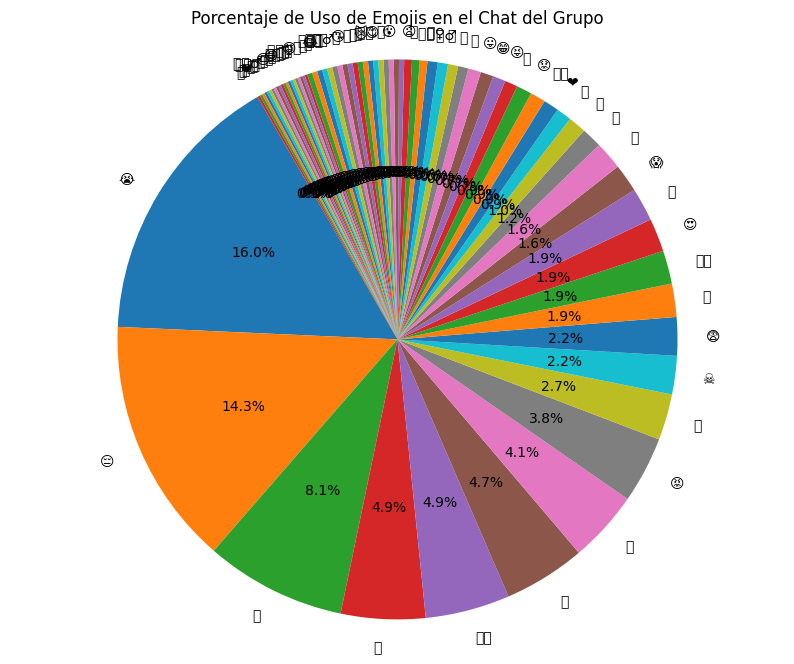

In [9]:
plt.figure(figsize=(10, 8))
plt.pie(emoji_df['Cantidad'], labels=emoji_df.index, autopct='%1.1f%%', startangle=120)
plt.title('Porcentaje de Uso de Emojis en el Chat del Grupo')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# ESTADISTICAS DE PERSONAS

In [10]:
# Determinar los miembros más activos del grupo
df_MiembrosActivos = df.groupby('Miembro')['Mensaje'].count().sort_values(ascending=False).to_frame()
df_MiembrosActivos.reset_index(inplace=True)
df_MiembrosActivos.index = np.arange(1, len(df_MiembrosActivos)+1)
df_MiembrosActivos

,Miembro,Mensaje
1,Timbre <33333,11032
2,.,8627


In [11]:
# Separar mensajes (sin multimedia) y multimedia (stickers, fotos, videos)
multimedia_df = df[df['Mensaje'] == '<Multimedia omitido>']
mensajes_df = df.drop(multimedia_df.index)

# Contar la cantidad de palabras y letras por mensaje
mensajes_df['Letras'] = mensajes_df['Mensaje'].apply(lambda s : len(s))
mensajes_df['Palabras'] = mensajes_df['Mensaje'].apply(lambda s : len(s.split(' ')))
pd.DataFrame(mensajes_df)


,Fecha,Hora,Miembro,Mensaje,Emojis,links,Letras,Palabras
0,2023-07-15,3:57 p. m.,Timbre <33333,Hola,[],0,4,1
1,2023-07-15,3:57 p. m.,Timbre <33333,?,[],0,1,1
2,2023-07-15,3:57 p. m.,.,Hola,[],0,4,1
3,2023-07-15,3:57 p. m.,.,quien eres?,[],0,11,2
4,2023-07-15,3:57 p. m.,.,kajdkd,[],0,6,1
...,...,...,...,...,...,...,...,...
19650,2023-11-30,9:14 p. m.,.,Dime,[],0,4,1
19653,2023-11-30,9:18 p. m.,.,como se supone que haga esoo KJSKDKF,[],0,36,7
19654,2023-11-30,9:19 p. m.,.,ya vi comp,[],0,10,3
19655,2023-11-30,9:19 p. m.,.,Ya vi como*,[],0,11,3


In [12]:
# Obtener a todos los miembros
miembros = mensajes_df.Miembro.unique()

# Crear diccionario donde se almacenará todos los datos
dictionario = {}

for i in range(len(miembros)):
    lista = []
    # Filtrar mensajes de un miembro en específico
    miembro_df= mensajes_df[mensajes_df['Miembro'] == miembros[i]]

    # Agregar a la lista el número total de mensajes enviados
    lista.append(miembro_df.shape[0])
    
    # Agregar a la lista el número de palabras por total de mensajes (palabras por mensaje)
    palabras_por_msj = (np.sum(miembro_df['Palabras']))/miembro_df.shape[0]
    lista.append(palabras_por_msj)

    # Agregar a la lista el número de mensajes multimedia enviados
    multimedia = multimedia_df[multimedia_df['Miembro'] == miembros[i]].shape[0]
    lista.append(multimedia)

    # Agregar a la lista el número total de emojis enviados
    emojis = sum(miembro_df['Emojis'].str.len())
    lista.append(emojis)

    # Agregar a la lista el número total de links enviados
    links = sum(miembro_df['links'])
    lista.append(links)

    # Asignar la lista como valor a la llave del diccionario
    dictionario[miembros[i]] = lista
    
print(dictionario)

{'Timbre <33333': [9432, 4.569762510602205, 1600, 250, 246], '.': [8411, 2.948400903578647, 216, 427, 34]}


In [13]:
# Convertir de diccionario a dataframe
miembro_stats_df = pd.DataFrame.from_dict(dictionario)

# Cambiar el índice por la columna agregada 'Estadísticas'
estadísticas = ['Mensajes', 'Palabras por mensaje', 'Multimedia', 'Emojis', 'Links']
miembro_stats_df['Estadísticas'] = estadísticas
miembro_stats_df.set_index('Estadísticas', inplace=True)

# Transponer el dataframe
miembro_stats_df = miembro_stats_df.T

#Convertir a integer las columnas Mensajes, Multimedia Emojis y Links
miembro_stats_df['Mensajes'] = miembro_stats_df['Mensajes'].apply(int)
miembro_stats_df['Multimedia'] = miembro_stats_df['Multimedia'].apply(int)
miembro_stats_df['Emojis'] = miembro_stats_df['Emojis'].apply(int)
miembro_stats_df['Links'] = miembro_stats_df['Links'].apply(int)
miembro_stats_df.sort_values(by=['Mensajes'], ascending=False)

Estadísticas,Mensajes,Palabras por mensaje,Multimedia,Emojis,Links
Timbre <33333,9432,4.569763,1600,250,246
.,8411,2.948401,216,427,34


# COMPORTAMIENTO DEL CHAT

In [21]:
df['Hora'] = df['Hora'].str.replace('p. m.', 'PM').str.replace('a. m.', 'AM')
df['rangoHora'] = pd.to_datetime(df['Hora'])

# Define a function to create the "Range Hour" column
def create_range_hour(hour):
    start_hour = hour.hour
    end_hour = (hour + pd.Timedelta(hours=1)).hour
    return f'{start_hour:02d} - {end_hour:02d} h'

# # Apply the function to create the "Range Hour" column
df['rangoHora'] = df['rangoHora'].apply(create_range_hour)
df

           Fecha        Hora        Miembro               Mensaje Emojis  \
0     2023-07-15  3:57 p. m.  Timbre <33333                  Hola     []   
1     2023-07-15  3:57 p. m.  Timbre <33333                     ?     []   
2     2023-07-15  3:57 p. m.              .                  Hola     []   
3     2023-07-15  3:57 p. m.              .           quien eres?     []   
4     2023-07-15  3:57 p. m.              .                kajdkd     []   
...          ...         ...            ...                   ...    ...   
19654 2023-11-30  9:19 p. m.              .            ya vi comp     []   
19655 2023-11-30  9:19 p. m.              .           Ya vi como*     []   
19656 2023-11-30  9:19 p. m.              .     incluyó archivos?     []   
19657 2023-11-30  9:19 p. m.  Timbre <33333  <Multimedia omitido>     []   
19658 2023-11-30  9:19 p. m.  Timbre <33333  <Multimedia omitido>     []   

       links  rangoHora  # Mensajes por hora  # Mensajes por dia  
0          0  15 - 1

C:\Users\PERSONAL\AppData\Local\Temp\ipykernel_4300\3868108734.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['rangoHora'] = pd.to_datetime(df['Hora'])


# MENSAJES POR HORA

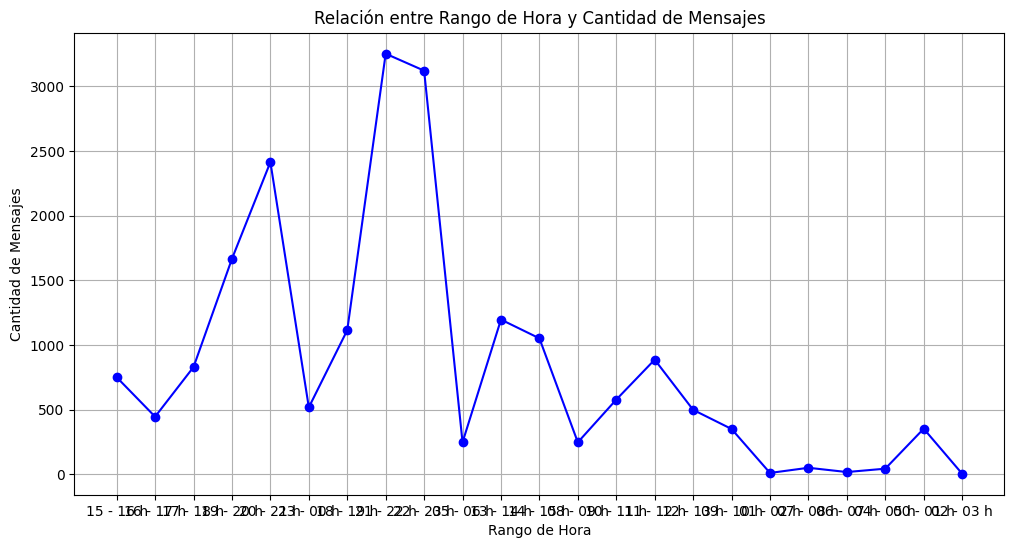

<Figure size 2400x1200 with 0 Axes>

In [15]:
# Crear una columna de 1 para realizar el conteo de mensajes
df['# Mensajes por hora'] = 1

df['# Mensajes por hora'] = df.groupby('rangoHora')['# Mensajes por hora'].transform('sum')

# Eliminar duplicados para evitar la sobrecontabilización
#df = df.drop_duplicates(subset=['rangoHora', '# Mensajes por hora'])
df_rangos = df.drop_duplicates(subset=['rangoHora', '# Mensajes por hora'])

#Plotear la cantidad de mensajes respecto del tiempo
plt.figure(figsize=(12, 6)) 
plt.plot(df_rangos['rangoHora'], df_rangos['# Mensajes por hora'], marker='o', linestyle='-', color='b')

# Personaliza el gráfico según tus preferencias
plt.title('Relación entre Rango de Hora y Cantidad de Mensajes')
plt.xlabel('Rango de Hora')
plt.ylabel('Cantidad de Mensajes')
plt.grid(True)

plt.figure(figsize=(24, 12)) 
plt.show()

In [16]:
df_rangos

,Fecha,Hora,Miembro,Mensaje,Emojis,links,rangoHora,# Mensajes por hora
0,2023-07-15,3:57 p. m.,Timbre <33333,Hola,[],0,15 - 16 h,751
21,2023-07-15,4:01 p. m.,Timbre <33333,Ish,[],0,16 - 17 h,446
59,2023-07-15,5:02 p. m.,Timbre <33333,Oye y,[],0,17 - 18 h,830
63,2023-07-15,7:07 p. m.,Timbre <33333,Holaaaa,[],0,19 - 20 h,1667
70,2023-07-15,8:42 p. m.,Timbre <33333,<Multimedia omitido>,[],0,20 - 21 h,2415
71,2023-07-15,11:00 p. m.,Timbre <33333,<Multimedia omitido>,[],0,23 - 00 h,518
72,2023-07-16,6:53 p. m.,Timbre <33333,"Oye, por si acaso, ya lo resolví, gracias :D",[],0,18 - 19 h,1115
91,2023-07-17,9:27 p. m.,Timbre <33333,Por que a veces tardas tanto en contestar?,[],0,21 - 22 h,3253
93,2023-07-17,10:36 p. m.,.,Yo,[],0,22 - 23 h,3122
114,2023-07-18,5:25 a. m.,Timbre <33333,JAJAJAJAJAJAJA claro como eso es de mi cara AJ...,[],0,05 - 06 h,248


In [17]:
df

,Fecha,Hora,Miembro,Mensaje,Emojis,links,rangoHora,# Mensajes por hora
0,2023-07-15,3:57 p. m.,Timbre <33333,Hola,[],0,15 - 16 h,751
1,2023-07-15,3:57 p. m.,Timbre <33333,?,[],0,15 - 16 h,751
2,2023-07-15,3:57 p. m.,.,Hola,[],0,15 - 16 h,751
3,2023-07-15,3:57 p. m.,.,quien eres?,[],0,15 - 16 h,751
4,2023-07-15,3:57 p. m.,.,kajdkd,[],0,15 - 16 h,751
...,...,...,...,...,...,...,...,...
19654,2023-11-30,9:19 p. m.,.,ya vi comp,[],0,21 - 22 h,3253
19655,2023-11-30,9:19 p. m.,.,Ya vi como*,[],0,21 - 22 h,3253
19656,2023-11-30,9:19 p. m.,.,incluyó archivos?,[],0,21 - 22 h,3253
19657,2023-11-30,9:19 p. m.,Timbre <33333,<Multimedia omitido>,[],0,21 - 22 h,3253


# MENSAJES POR DIA

In [18]:
# Crear una columna de 1 para realizar el conteo de mensajes
df['# Mensajes por dia'] = 1

# Sumar (contar) los mensajes que tengan la misma fecha
df['# Mensajes por dia'] = df.groupby('Fecha')['# Mensajes por dia'].transform('sum')

# Eliminar duplicados para evitar la sobrecontabilización
#df = df.drop_duplicates(subset=['rangoHora', '# Mensajes por hora'])
df_dias = df.drop_duplicates(subset=['Fecha', '# Mensajes por dia'])

df_dias

,Fecha,Hora,Miembro,Mensaje,Emojis,links,rangoHora,# Mensajes por hora,# Mensajes por dia
0,2023-07-15,3:57 p. m.,Timbre <33333,Hola,[],0,15 - 16 h,751,72
72,2023-07-16,6:53 p. m.,Timbre <33333,"Oye, por si acaso, ya lo resolví, gracias :D",[],0,18 - 19 h,1115,1
73,2023-07-17,5:16 p. m.,Timbre <33333,https://vm.tiktok.com/ZM24bqYTT/AJAJAJAJAJAHA yo,[],1,17 - 18 h,830,41
114,2023-07-18,5:25 a. m.,Timbre <33333,JAJAJAJAJAJAJA claro como eso es de mi cara AJ...,[],0,05 - 06 h,248,53
167,2023-07-19,5:55 a. m.,Timbre <33333,🧌,[🧌],0,05 - 06 h,248,33
...,...,...,...,...,...,...,...,...,...
18963,2023-11-26,12:18 a. m.,Timbre <33333,No puede ser,[],0,00 - 01 h,353,276
19239,2023-11-27,11:16 a. m.,Timbre <33333,Es la primera vez q voy en un indrive,[],0,11 - 12 h,887,36
19275,2023-11-28,12:17 p. m.,Timbre <33333,https://vm.tiktok.com/ZM6eS3Smx/ JAJAJAJA si paso,[],1,12 - 13 h,499,183
19458,2023-11-29,7:07 a. m.,Timbre <33333,Holaaa,[],0,07 - 08 h,51,54


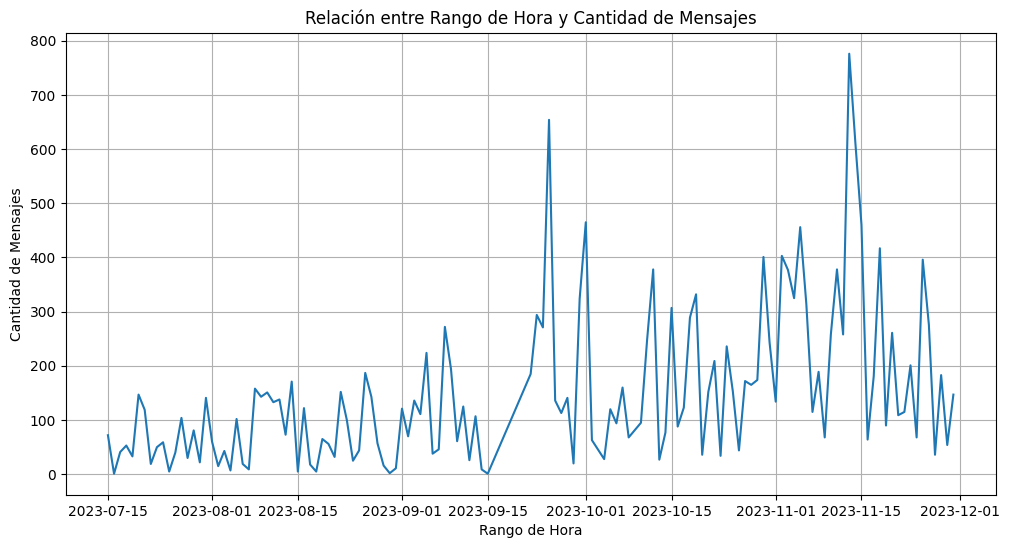

<Figure size 1200x600 with 0 Axes>

In [19]:
plt.figure(figsize=(12, 6)) 
plt.plot(df_dias['Fecha'], df_dias['# Mensajes por dia'])

# Personaliza el gráfico según tus preferencias
plt.title('Relación entre Rango de Hora y Cantidad de Mensajes')
plt.xlabel('Rango de Hora')
plt.ylabel('Cantidad de Mensajes')
plt.grid(True)

plt.figure(figsize=(12, 6)) 
plt.show()

# PALABRAS QUE MAS USAMOS

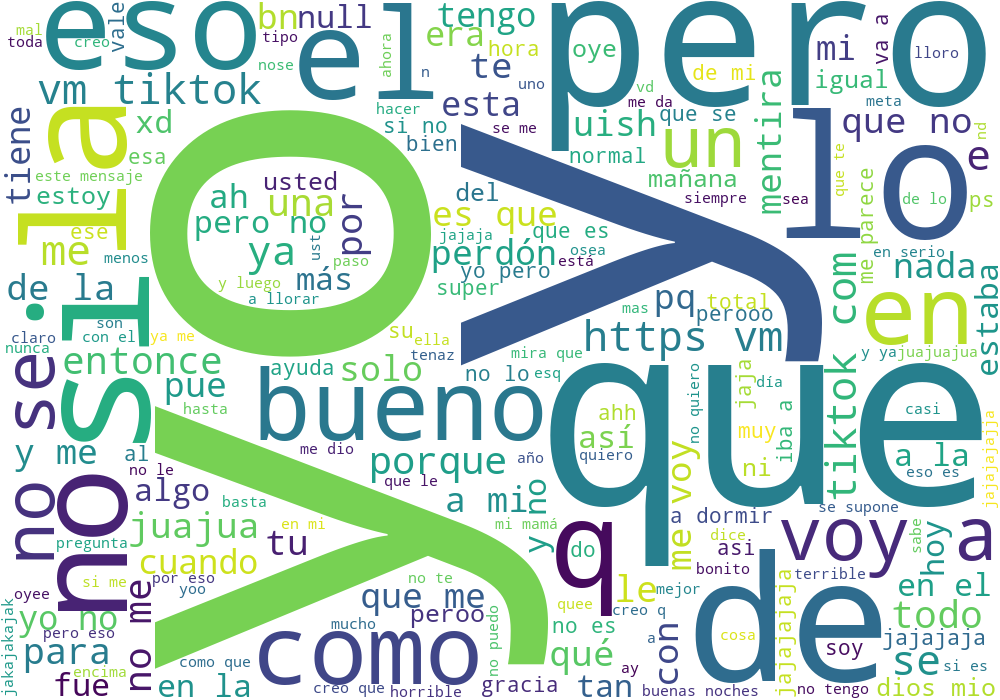

In [20]:
# Crear un string que contendrá todas las palabras
total_palabras = ' '

# Obtener y acumular todas las palabras de cada mensaje
for mensaje in mensajes_df['Mensaje'].values:
    palabras = str(mensaje).lower().split() # Obtener las palabras de cada línea del txt
    for palabra in palabras:
        total_palabras = total_palabras + palabra + ' ' # Acumular todas las palabras

wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                stopwords = 'stopwords',
                min_font_size = 10).generate(total_palabras)

# Plotear la nube de palabras más usadas
wordcloud.to_image()